##### Residual Connection

##### Batch Normalization

#### Depthwise separable convolutions

### mini Xception

In [1]:
import os, shutil, pathlib
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout, add, Dense
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [3]:
train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
augmentation = Sequential([RandomFlip("horizontal"), RandomRotation(0.1), RandomZoom(0.2)])

In [7]:
inputs = Input(shape=(180, 180, 3))

x = augmentation(inputs)

x = Rescaling(1./255)(x)

x = Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    
    residual = x

    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    
    x = add([x, residual])

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [16]:
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset)

Epoch 1/100
63/63 [==============================] - 23s 233ms/step - loss: 0.7253 - accuracy: 0.5640 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 14s 227ms/step - loss: 0.6655 - accuracy: 0.5985 - val_loss: 0.6925 - val_accuracy: 0.5040
Epoch 3/100
63/63 [==============================] - 14s 224ms/step - loss: 0.6586 - accuracy: 0.6115 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 14s 226ms/step - loss: 0.6262 - accuracy: 0.6430 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 14s 225ms/step - loss: 0.6025 - accuracy: 0.6830 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 6/100
63/63 [==============================] - 14s 225ms/step - loss: 0.5756 - accuracy: 0.7020 - val_loss: 0.7535 - val_accuracy: 0.5000
Epoch 7/100
63/63 [==============================] - 14s 225ms/step - loss: 0.5482 - accuracy: 0.7285 - val_loss: 1.0439 - val_accuracy:

Epoch 41/100
63/63 [==============================] - 15s 230ms/step - loss: 0.2141 - accuracy: 0.9020 - val_loss: 0.3775 - val_accuracy: 0.8300
Epoch 42/100
63/63 [==============================] - 14s 229ms/step - loss: 0.1869 - accuracy: 0.9250 - val_loss: 1.0252 - val_accuracy: 0.7230
Epoch 43/100
63/63 [==============================] - 14s 229ms/step - loss: 0.1908 - accuracy: 0.9225 - val_loss: 1.0199 - val_accuracy: 0.6630
Epoch 44/100
63/63 [==============================] - 14s 228ms/step - loss: 0.2075 - accuracy: 0.9160 - val_loss: 0.3573 - val_accuracy: 0.8550
Epoch 45/100
63/63 [==============================] - 15s 230ms/step - loss: 0.2004 - accuracy: 0.9185 - val_loss: 0.6700 - val_accuracy: 0.7510
Epoch 46/100
63/63 [==============================] - 14s 229ms/step - loss: 0.1795 - accuracy: 0.9235 - val_loss: 0.7944 - val_accuracy: 0.7860
Epoch 47/100
63/63 [==============================] - 14s 229ms/step - loss: 0.1875 - accuracy: 0.9235 - val_loss: 0.4206 - val_ac

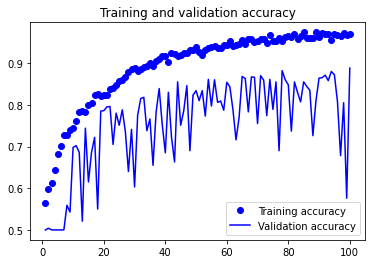

In [22]:
epochs = range(1, len(history.history["accuracy"]) + 1)
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.figure()
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

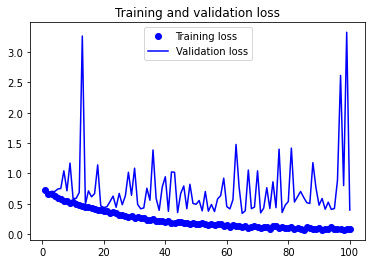

In [21]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()